In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X.shape

(70000, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

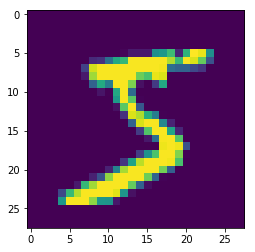

In [16]:
plt.imshow(some_digit_image)

In [17]:
y[0]

'5'

In [19]:
import numpy as np
y = y.astype(np.uint8)

In [20]:
y[0]

5

In [50]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [51]:
X_train.shape

(60000, 784)

In [52]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [53]:
print(y_train_5.shape)
print(y_test_5.shape)

(60000,)
(10000,)


In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
sgd_clf = SGDClassifier()

In [56]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
sgd_clf.predict([some_digit])

array([ True])

In [58]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [66]:
from sklearn.model_selection import cross_val_predict

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [61]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_train_5, y_train_pred)

array([[54059,   520],
       [ 1592,  3829]])

In [64]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53570,  1009],
       [ 1491,  3930]])

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_train_5, y_train_pred)

0.7957076331241142

In [70]:
recall_score(y_train_5, y_train_pred)

0.7249584947426674

In [71]:
from sklearn.metrics import f1_score

In [72]:
f1_score(y_train_5, y_train_pred)

0.7586872586872587

In [74]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([57.04427241])

In [75]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [76]:
y_some_digit_pred

array([ True])

In [77]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [78]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [79]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

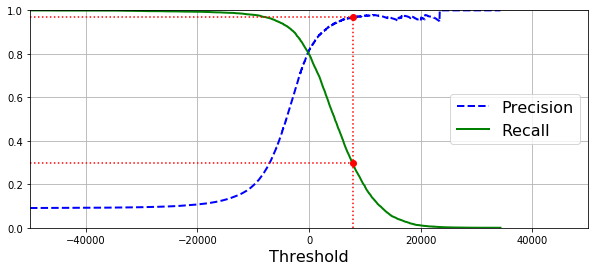

In [97]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(10, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.97], "r:")         # Not shown
plt.plot([-50000, 7813], [0.97, 0.97], "r:")      # Not shown
plt.plot([-50000, 7813], [0.3000, 0.3000], "r:")# Not shown
plt.plot([7813], [0.97], "ro")                   # Not shown
plt.plot([7813], [0.3000], "ro")                # Not shown
plt.show()

In [93]:
(y_train_pred == (y_scores > 0)).all()

False

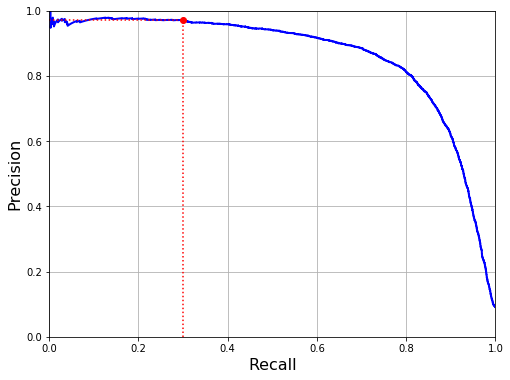

In [100]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.3000, 0.3000], [0., 0.97], "r:")
plt.plot([0.0, 0.3000], [0.97, 0.97], "r:")
plt.plot([0.3000], [0.97], "ro")
plt.show()